In [4]:
import sys; 
sys.path.insert(0, '/Users/erezcohen/larlite/UserDev/mySoftware/MySoftwarePackage/mac/'); 
from plot_tools import *;
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
from matplotlib import ticker

# electron selection efficiency as a function of  calorimetry variables
using single-particle $e$- and $\pi$-gun simulations from build fb01759 and 419662c

In [47]:
main_data_path = '/Users/erezcohen/Desktop/data/EIC/ECCE/ElectronPionPID/EvalFiles/CSVfiles/';
e_color = 'k';
pi_color='royalblue';

In [301]:
e_data,pi_data = dict(),dict()
for filelabel,chainname in zip(['hcalin','hcalout','fhcal','femc','tracking'],
                               ['ntp_cluster','ntp_cluster','ntp_cluster','ntp_cluster','tracks']):
    e_data[filelabel] = pd.read_csv(main_data_path + 'singleElectron_'+filelabel+'_'+chainname+'.csv');
    pi_data[filelabel] = pd.read_csv(main_data_path + 'singlePion_'+filelabel+'_'+chainname+'.csv');
    print len(e_data[filelabel]),'electrons and',len(pi_data[filelabel]),'pions in',filelabel

274 electrons and 677503 pions in hcalin
251642 electrons and 1293712 pions in hcalout
64433 electrons and 551465 pions in fhcal
386557 electrons and 0 pions in femc
1000 electrons and 902000 pions in tracking


# Merge data frames - to combine data from the same run and event

In [332]:
e_data['hcalin'][0:5][['run','event','clusterID','eta','x']]

,run,event,clusterID,eta,x
0,999000,2,0,0.077993,128.28500
1,999000,5,0,0.623877,-58.25440
2,999000,9,0,0.755373,33.10600
3,999000,9,1,0.756037,-11.12100
4,999000,9,2,0.835706,6.68547


In [329]:
e_data['tracking'][0:10][['run','event','trackID','nhits','px']]

,run,event,trackID,nhits,px
0,999000,1,0,0,-1.305080
1,999000,2,0,0,1.866700
2,999000,3,0,0,-0.839955
3,999000,4,0,0,3.751330
4,999000,5,0,0,0.995497
5,999000,6,0,0,-7.854580
6,999000,7,0,0,-0.061434
7,999000,8,0,0,0.041137
8,999000,9,0,0,-0.361014
9,999000,10,0,0,0.262302


In [327]:
merged_e_data = pd.merge(e_data['tracking'],e_data['hcalin'],
                         on=['run','event'],
                         suffixes=('_tracking','_hcalin'))#,
merged_e_data[0:5][['run','event','clusterID','eta','x','trackID','nhits','px']]

,run,event,clusterID,eta,x,trackID,nhits,px
0,999000,2,0,0.077993,128.28500,0,0,1.866700
1,999000,5,0,0.623877,-58.25440,0,0,0.995497
2,999000,9,0,0.755373,33.10600,0,0,-0.361014
3,999000,9,1,0.756037,-11.12100,0,0,-0.361014
4,999000,9,2,0.835706,6.68547,0,0,-0.361014


In [284]:
e_data['tracking'][0:3]

,run,event,trackID,charge,nhits,px,py,pz,pcax,pcay,pcaz,dca2d,Unnamed: 12
0,748000.0,8.182770e-30,0,-1,0,9.86101,1.71020,-10.12450,-0.006053,-0.001258,-0.291574,0.006492,NaN
1,748000.0,8.182770e-30,0,-1,0,0.32505,5.29794,-18.10140,0.000277,0.004597,3.055030,-0.001667,NaN
2,748000.0,8.182770e-30,0,-1,0,7.56821,-5.26857,3.72326,-0.000457,-0.000638,-0.627780,-0.007951,NaN


## define cluster transverse distance from center

In [219]:
for filelabel in ['hcalin','hcalout','fhcal']:
    e_data[filelabel]['rho']  = np.sqrt( np.square(e_data[filelabel]['x']) + np.square(e_data[filelabel]['y']) )
    pi_data[filelabel]['rho'] = np.sqrt( np.square(pi_data[filelabel]['x']) + np.square(pi_data[filelabel]['y']) )

# "hot-spot" behavior in cluster position in the calorimeters
This is because a reconstructed cluster position is assigned to a block in discrete locations

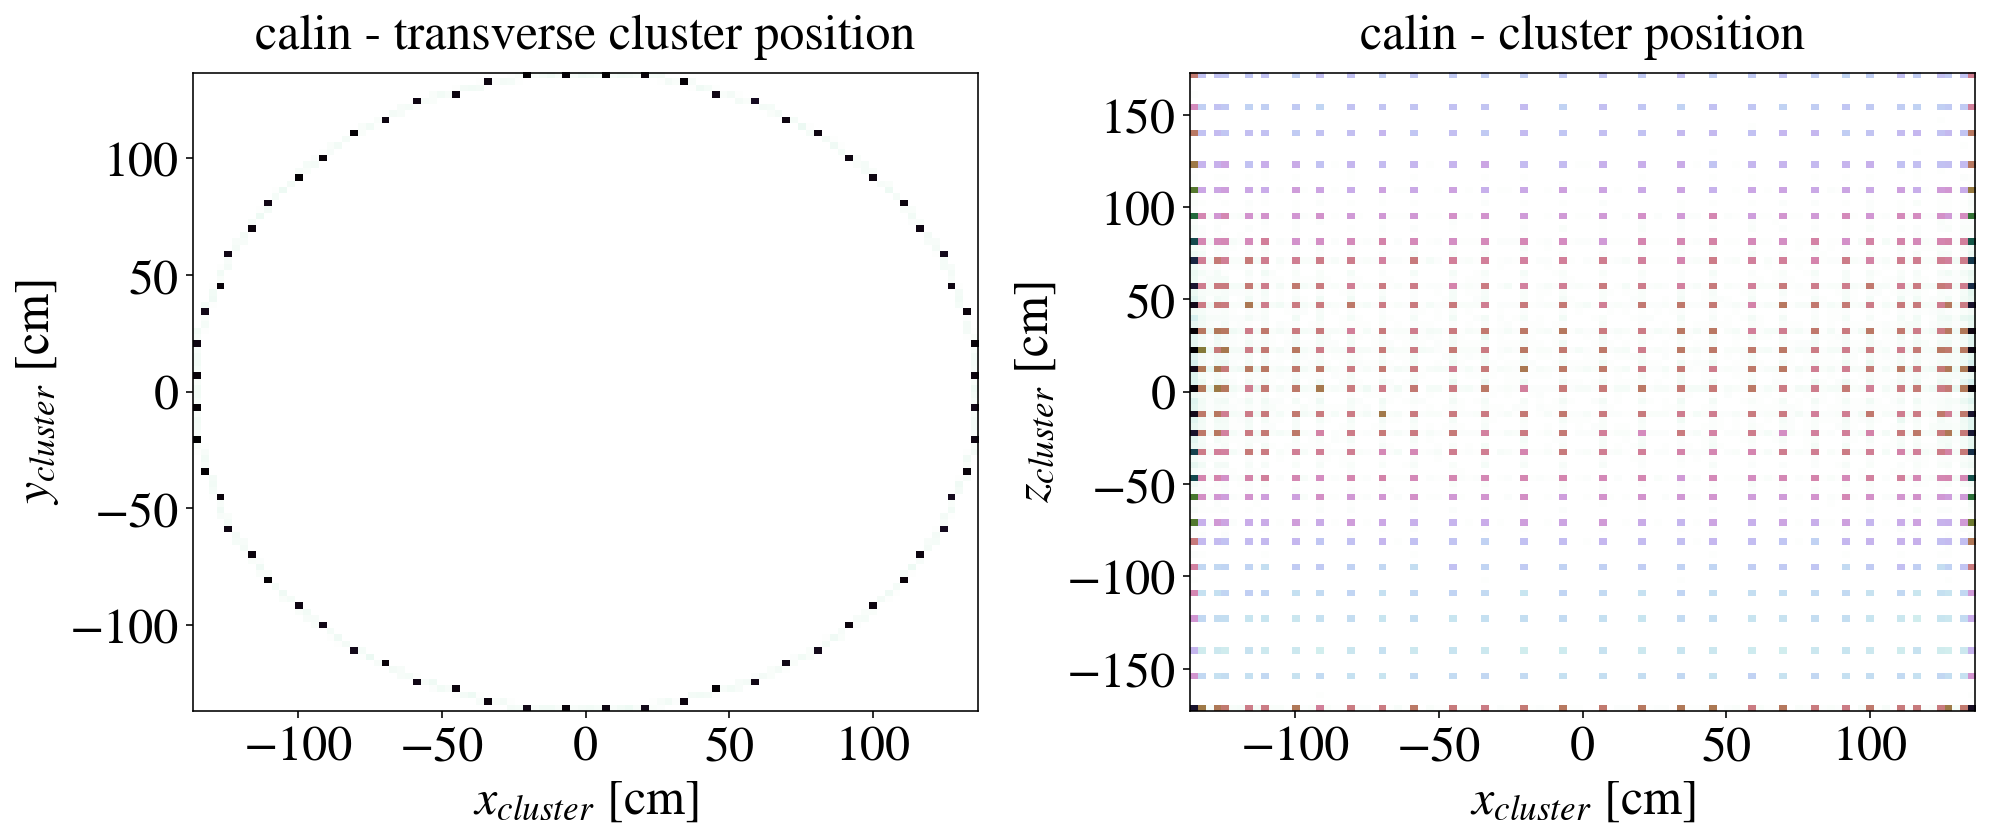

In [271]:
fig=plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,2,1)
plt.hist2d(e_data['hcalin']['x'],e_data['hcalin']['y'],bins=100,cmap='cubehelix_r')
set_axes(ax,'$x_{cluster}$ [cm]','$y_{cluster}$ [cm]',title='calin - transverse cluster position',do_add_legend=False)

ax = fig.add_subplot(1,2,2)
plt.hist2d(e_data['hcalin']['x'],e_data['hcalin']['z'],bins=100,cmap='cubehelix_r')
set_axes(ax,'$x_{cluster}$ [cm]','$z_{cluster}$ [cm]',title='calin - cluster position',do_add_legend=False)

plt.tight_layout();

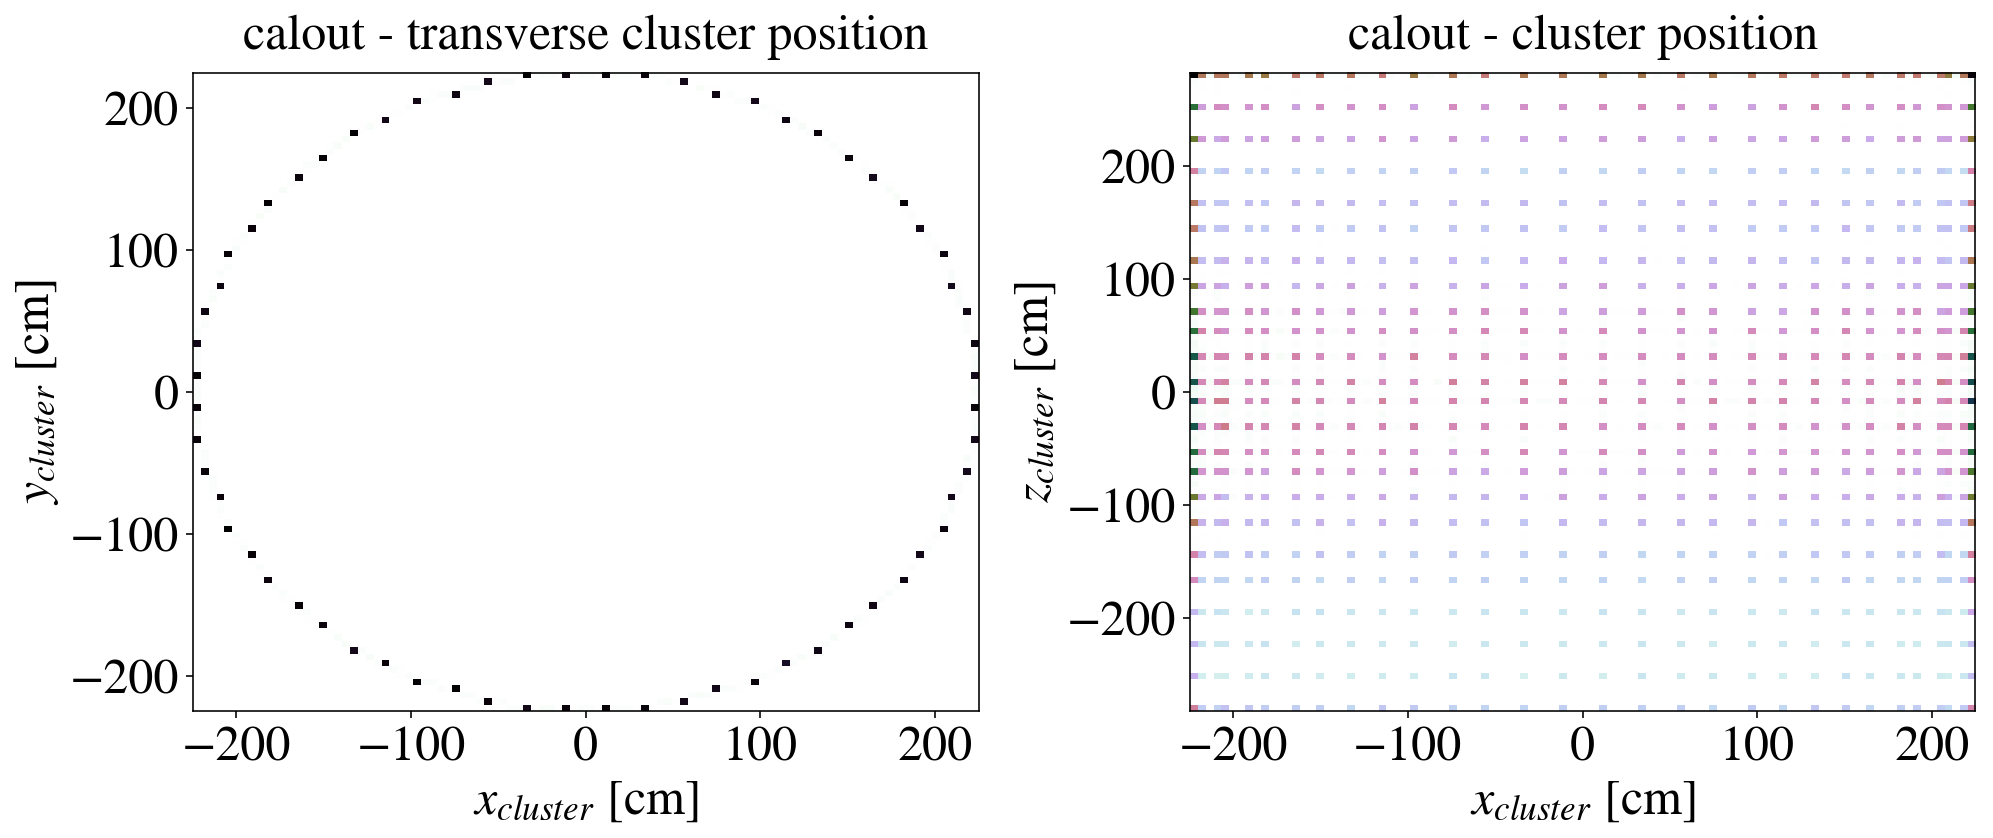

In [272]:
fig=plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,2,1)
plt.hist2d(e_data['hcalout']['x'],e_data['hcalout']['y'],bins=100,cmap='cubehelix_r')
set_axes(ax,'$x_{cluster}$ [cm]','$y_{cluster}$ [cm]',
         title='calout - transverse cluster position',do_add_legend=False,
         xticks=(-200,-100,0,100,200),
         yticks=(-200,-100,0,100,200))

ax = fig.add_subplot(1,2,2)
plt.hist2d(e_data['hcalout']['x'],e_data['hcalout']['z'],bins=100,cmap='cubehelix_r')
set_axes(ax,'$x_{cluster}$ [cm]','$z_{cluster}$ [cm]',
         title='calout - cluster position',do_add_legend=False,
         xticks=(-200,-100,0,100,200))

plt.tight_layout();

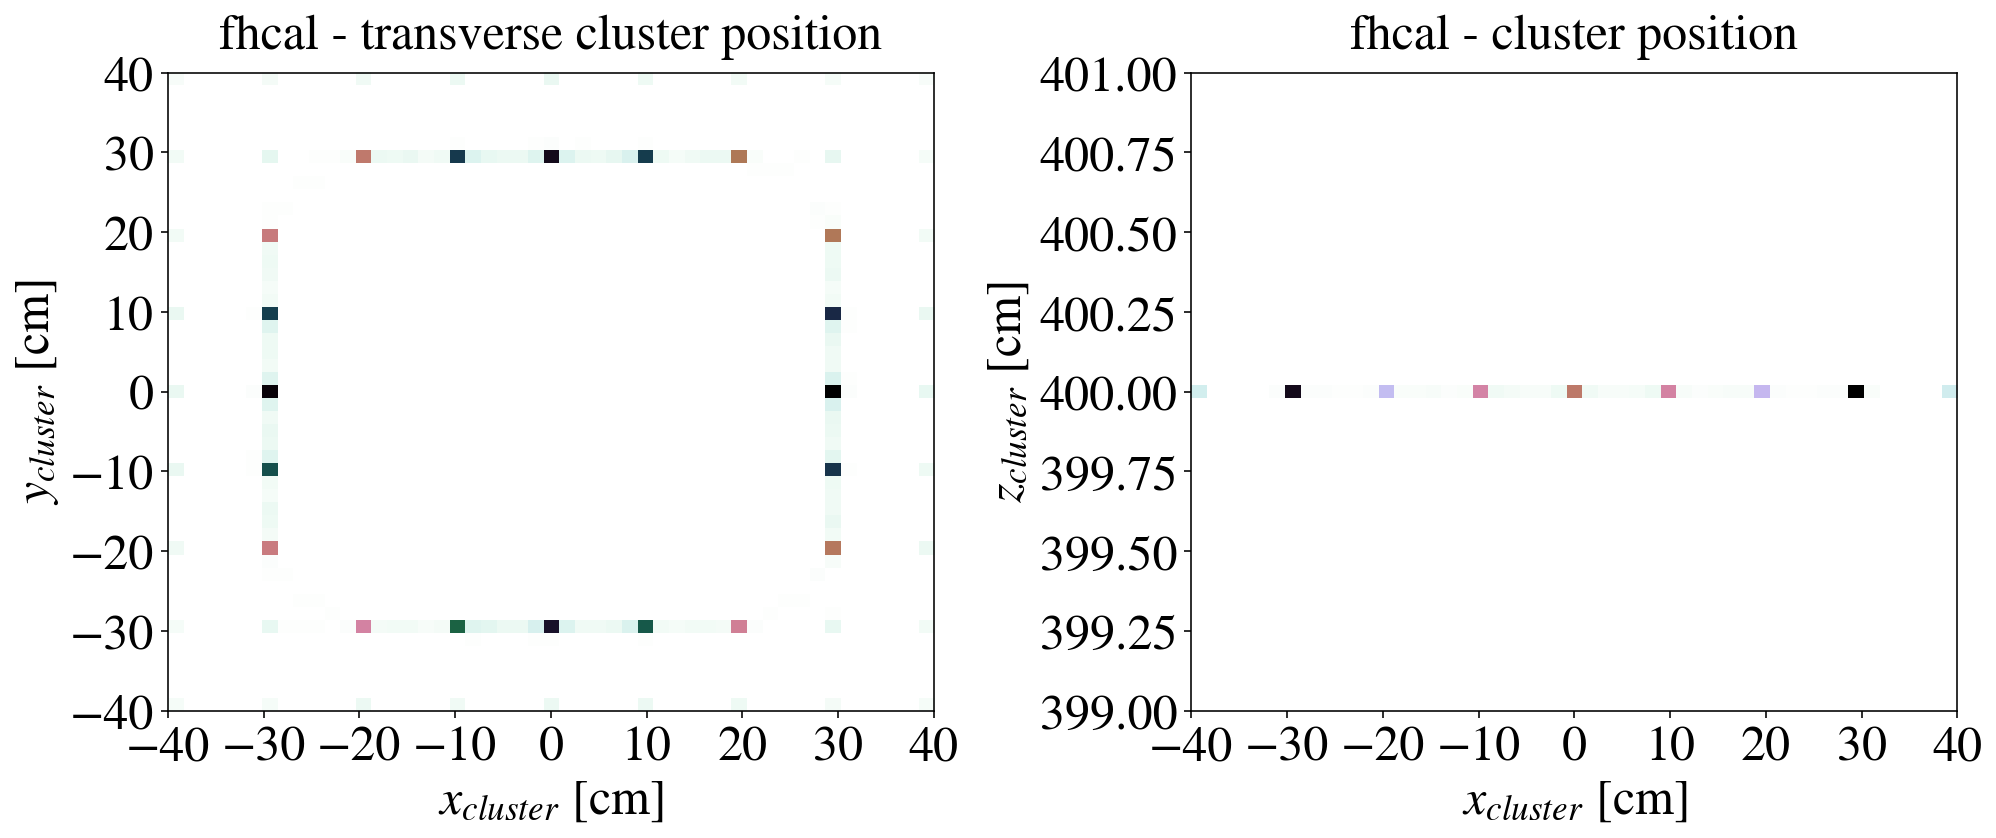

In [270]:
fig=plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,2,1)
plt.hist2d(e_data['fhcal']['x'],e_data['fhcal']['y'],
           bins=(np.linspace(-40,40,50),np.linspace(-40,40,50)),
           cmap='cubehelix_r')
set_axes(ax,'$x_{cluster}$ [cm]','$y_{cluster}$ [cm]',
         title='fhcal - transverse cluster position',do_add_legend=False,
        )

ax = fig.add_subplot(1,2,2)
plt.hist2d(e_data['fhcal']['x'],e_data['fhcal']['z'],
           bins=(np.linspace(-40,40,50),np.linspace(399,401,50)),
           cmap='cubehelix_r')
set_axes(ax,'$x_{cluster}$ [cm]','$z_{cluster}$ [cm]',
         title='fhcal - cluster position',do_add_legend=False,
        )

plt.tight_layout();

In [217]:
# e_arr  = np.abs(e_data['hcalin']['z']);

# bins=np.linspace(0,300,121)
# fig,ax=plt.subplots()
# ax.hist( e_arr, bins=bins  , linewidth = 2 , label='ax.hist', density=True)

# e_hist,edges  = np.histogram( e_arr,  bins=bins, density=True )
# x = (edges[1:]+edges[:-1])/2    
# ax.step( x, e_hist, where='mid', linewidth = 2 , label='np.histogram')
# set_axes(ax,'','',do_add_legend=True)

# Now, look at 1D distribution
and apply selection cuts to check the impact on electorn and pion event selection

In [232]:
def Plot_e_and_pi_distribtions(chainname='hcalin',chainlabel='calin',
                               variable='e',varlabel='$\Delta E_{dep}$',varunits='[GeV]',
                               bins=np.linspace(0,2.,51),
                               ax=None, xticks=None, 
                               ylabel='Frequency [a.u.]', 
                               do_add_legend=True, yscale='log', fontsize=18,xlim=None):
    
    if ax is None: fig,ax = plt.subplots(figsize=(9,6))
    if '|' in variable: # take absolute value, e.g. |z|
        e_arr  = np.abs(e_data[chainname][variable[1:-1]]);
        pi_arr = np.abs(pi_data[chainname][variable[1:-1]]);        
        varlabel = '|' + varlabel + '|';
    else:
        e_arr  = e_data[chainname][variable];
        pi_arr = pi_data[chainname][variable];

    e_hist,edges  = np.histogram( e_arr,  bins=bins, density=True )
    pi_hist,edges = np.histogram( pi_arr, bins=bins, density=True )
    x = (edges[1:]+edges[:-1])/2
    
    ax.step( x, e_hist, color=e_color  , where='mid', linewidth = 2 , label='$e$')#, label='$e$, %.1fM evnets'%(len(e_data[chainname])*1e-6));
    ax.step( x, pi_hist, color=pi_color, where='mid', linewidth = 2 , label='$\pi$')#, label='$\pi$, %.1fM evnets'%(len(pi_data[chainname])*1e-6));
    
    set_axes(ax,
             varlabel + ' ' + varunits,ylabel,
             title = varlabel + ' in ' + chainlabel,
             do_add_grid=True,xticks=xticks, do_add_legend=do_add_legend,
             fontsize=fontsize,xlim=xlim)
    ax.set_yscale(yscale)
    plt.tight_layout()
    
    
    
def get_cut_efficiency(x, min_or_max, x_cut):
    '''
    compute selection efficiency of a given (min/max) 1D cut on x
    Uncertainty estimated assuming Poissonian uncertainty
    and bound from below by 0, and from above by eff_max=1
    
    input
    --------
    min_or_max     'min' / 'max'
    
    return
    --------
    eff, eff_err_dw, eff_err_up
    
    '''
    
    if min_or_max=='min':   N_in_cut= float(len( x [x_cut < x]));
    elif min_or_max=='max': N_in_cut= float(len( x [x < x_cut]));
        
    N_tot      = float(len(x))
    eff        = N_in_cut/N_tot
    
    if N_in_cut:  
        eff_err= eff * np.sqrt( 1./N_in_cut + 1./N_tot ) 
    else:
        eff_err= 1./N_tot
        
    eff_err_dw = eff_err;
    eff_err_up = eff_err;
    
    if eff_err_dw > eff_err:   eff_err_dw = eff_err;
    if eff_err_up > 1-eff_err: eff_err_up = 1.-eff_err;
        
    return eff, eff_err_dw, eff_err_up
    
def Plot_e_and_pi_1D_cut_impact(chainname='hcalin',chainlabel='calin',
                                variable='e',varlabel='$\Delta E_{dep}$',varunits='[GeV]',
                                min_or_max='min',
                                cut_values=np.linspace(0,2.,10),
                                ax=None, xticks=None, 
                                ylabel='Selection efficiency', 
                                do_add_legend=True, yscale='linear', fontsize=18,xlim=None,ylim=None):
    
    if ax is None: fig,ax = plt.subplots(figsize=(9,6))

    if '|' in variable:
        e_arr  = np.abs(e_data[chainname][variable[1:-1]]);
        pi_arr = np.abs(pi_data[chainname][variable[1:-1]]);        
        varlabel = '|' + varlabel + '|';
    else:
        e_arr  = e_data[chainname][variable];
        pi_arr = pi_data[chainname][variable];
        
    e_eff,  e_eff_err_dw,  e_eff_err_up  = [],[],[]
    pi_eff, pi_eff_err_dw, pi_eff_err_up = [],[],[]
    
    for cut_value in cut_values:#{
        e_eff_in_cut, e_eff_in_cut_err_dw, e_eff_in_cut_err_up    = get_cut_efficiency(e_arr , min_or_max, cut_value)
        pi_eff_in_cut, pi_eff_in_cut_err_dw, pi_eff_in_cut_err_up = get_cut_efficiency(pi_arr, min_or_max, cut_value)
        
        e_eff        .append( e_eff_in_cut         )
        e_eff_err_dw .append( e_eff_in_cut_err_dw  )
        e_eff_err_up .append( e_eff_in_cut_err_up  )

        pi_eff       .append( pi_eff_in_cut        )
        pi_eff_err_dw.append( pi_eff_in_cut_err_dw )
        pi_eff_err_up.append( pi_eff_in_cut_err_up )
    #}
    e_eff,  e_eff_err_dw,  e_eff_err_up  = np.array(e_eff),  np.array( e_eff_err_dw),  np.array( e_eff_err_up)
    pi_eff, pi_eff_err_dw, pi_eff_err_up = np.array(pi_eff), np.array( pi_eff_err_dw), np.array( pi_eff_err_up)
    
    ax.errorbar( cut_values, e_eff, [e_eff_err_dw,e_eff_err_up], marker='o',color=e_color,
                markeredgewidth = 0.2,
                markeredgecolor='k', capsize=3, capthick=3, linestyle = 'None', label='$e$ selection efficiency');
    ax.fill_between( cut_values, e_eff - e_eff_err_dw, e_eff + e_eff_err_up , color=e_color, alpha=0.1)
    ax.errorbar( cut_values, pi_eff, [pi_eff_err_dw,pi_eff_err_up], marker='o',color=pi_color,
                markeredgewidth = 0.2,
                markeredgecolor='k', capsize=3, capthick=3, linestyle = 'None', label='$\pi$ selection efficiency');
    ax.fill_between( cut_values, pi_eff - pi_eff_err_dw, pi_eff + pi_eff_err_up , color=pi_color, alpha=0.1)


    set_axes(ax,min_or_max + ' ' + varlabel + ' ' + varunits,
             ylabel,
             title = 'cut on ' + min_or_max + ' ' + varlabel + ' in ' + chainlabel,
             do_add_grid = True,
             xticks=xticks, do_add_legend=do_add_legend,
             fontsize=fontsize,xlim=xlim,ylim=ylim)
    ax.set_yscale(yscale)    
    plt.tight_layout()    
    
    
    
def plot_1D_variable_and_cut(chainname='hcalin',chainlabel='calin',
                               variable='e',varlabel='$\Delta E_{dep}$',varunits='[GeV]',
                               bins=np.linspace(0,2.,51),
                               xticks=None, min_or_max='min',
                                cut_values=np.linspace(0,2.,10),
                               do_add_legend=True, yscale='log', fontsize=18,xlim=None,ylim=None,
                             figsize=(14,6)):
    
    figure = plt.figure(figsize=figsize)
    ax = figure.add_subplot(1,2,1);
    Plot_e_and_pi_distribtions(chainname=chainname,chainlabel=chainlabel,
                               variable=variable,varlabel=varlabel,varunits=varunits,
                               bins=bins,
                               ax=ax, xticks=xticks, 
                               ylabel='Frequency [a.u.]', 
                               do_add_legend=True, yscale='log', fontsize=fontsize,xlim=xlim)

    ax = figure.add_subplot(1,2,2)
    Plot_e_and_pi_1D_cut_impact(chainname=chainname,chainlabel=chainlabel,
                                variable=variable,varlabel=varlabel,varunits=varunits,
                                min_or_max=min_or_max,
                                cut_values=cut_values,
                                ax=ax, xticks=xticks, 
                                ylabel='Selection efficiency', 
                                do_add_legend=True, yscale='linear', fontsize=fontsize,
                                xlim=(np.min(cut_values)-0.1,np.max(cut_values)),
                                ylim=ylim)
    plt.tight_layout()

# calin

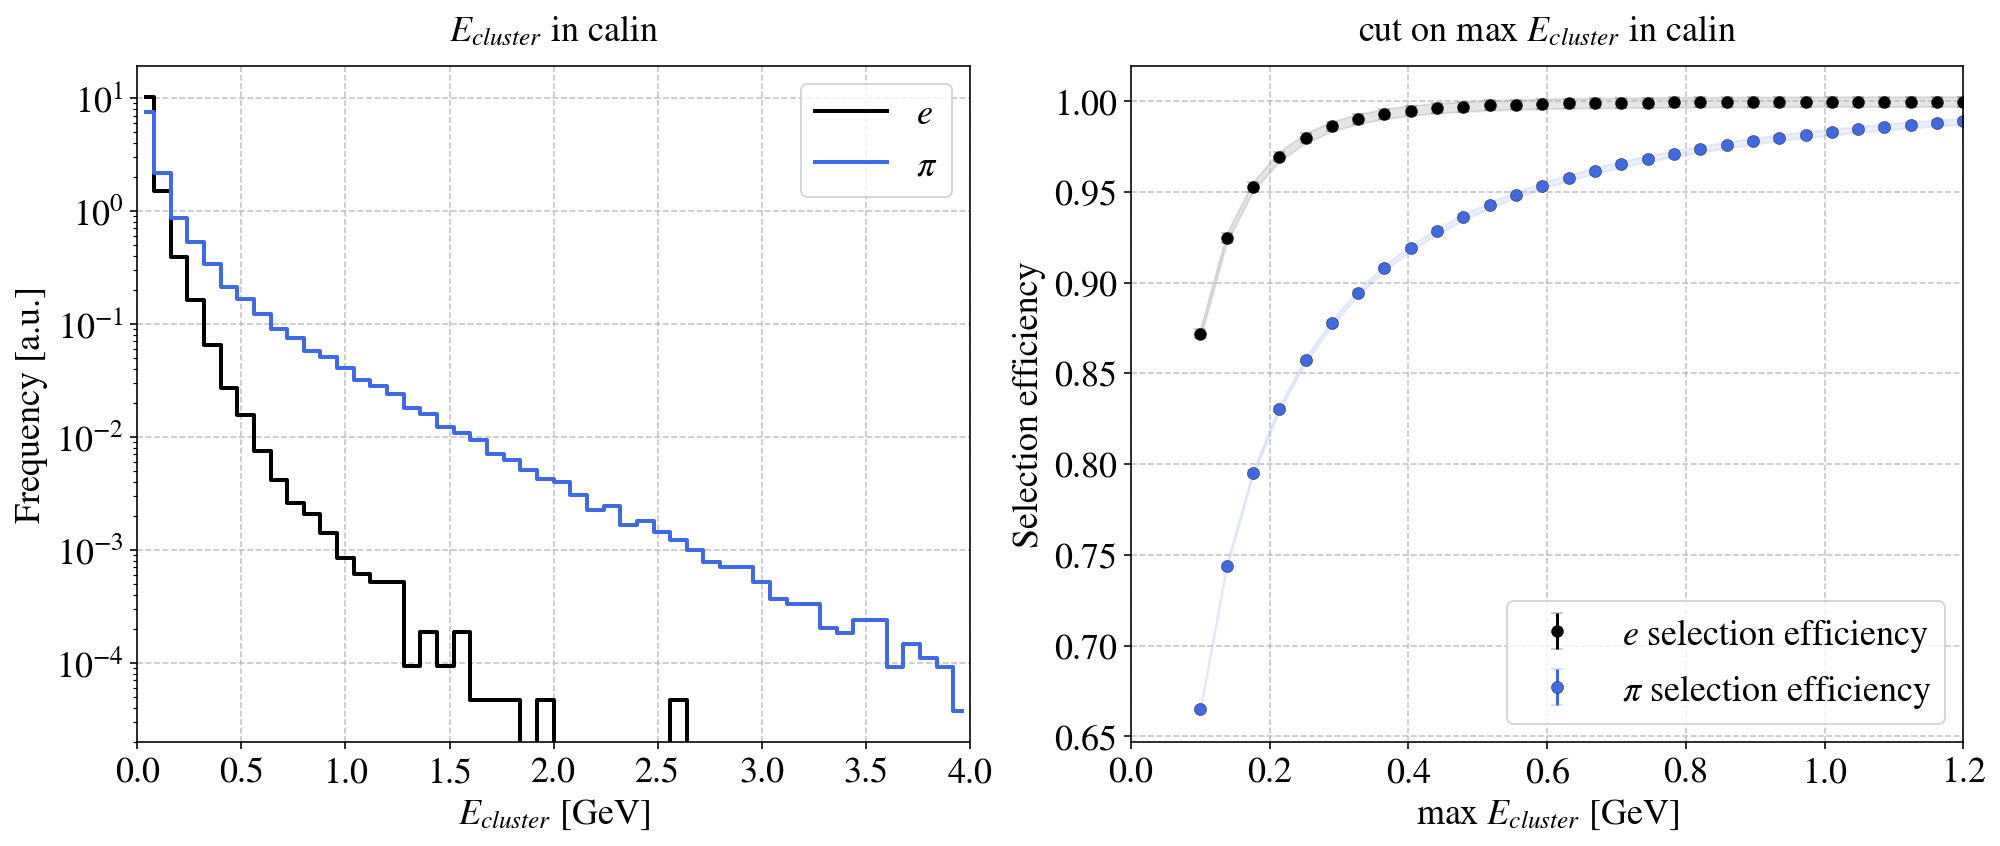

In [233]:
plot_1D_variable_and_cut(variable='e',varlabel='$E_{cluster}$',varunits='[GeV]',
                         bins=np.linspace(0,4.,51),xlim=(0,4),
                         cut_values=np.linspace(0.1,1.2,30),min_or_max='max')

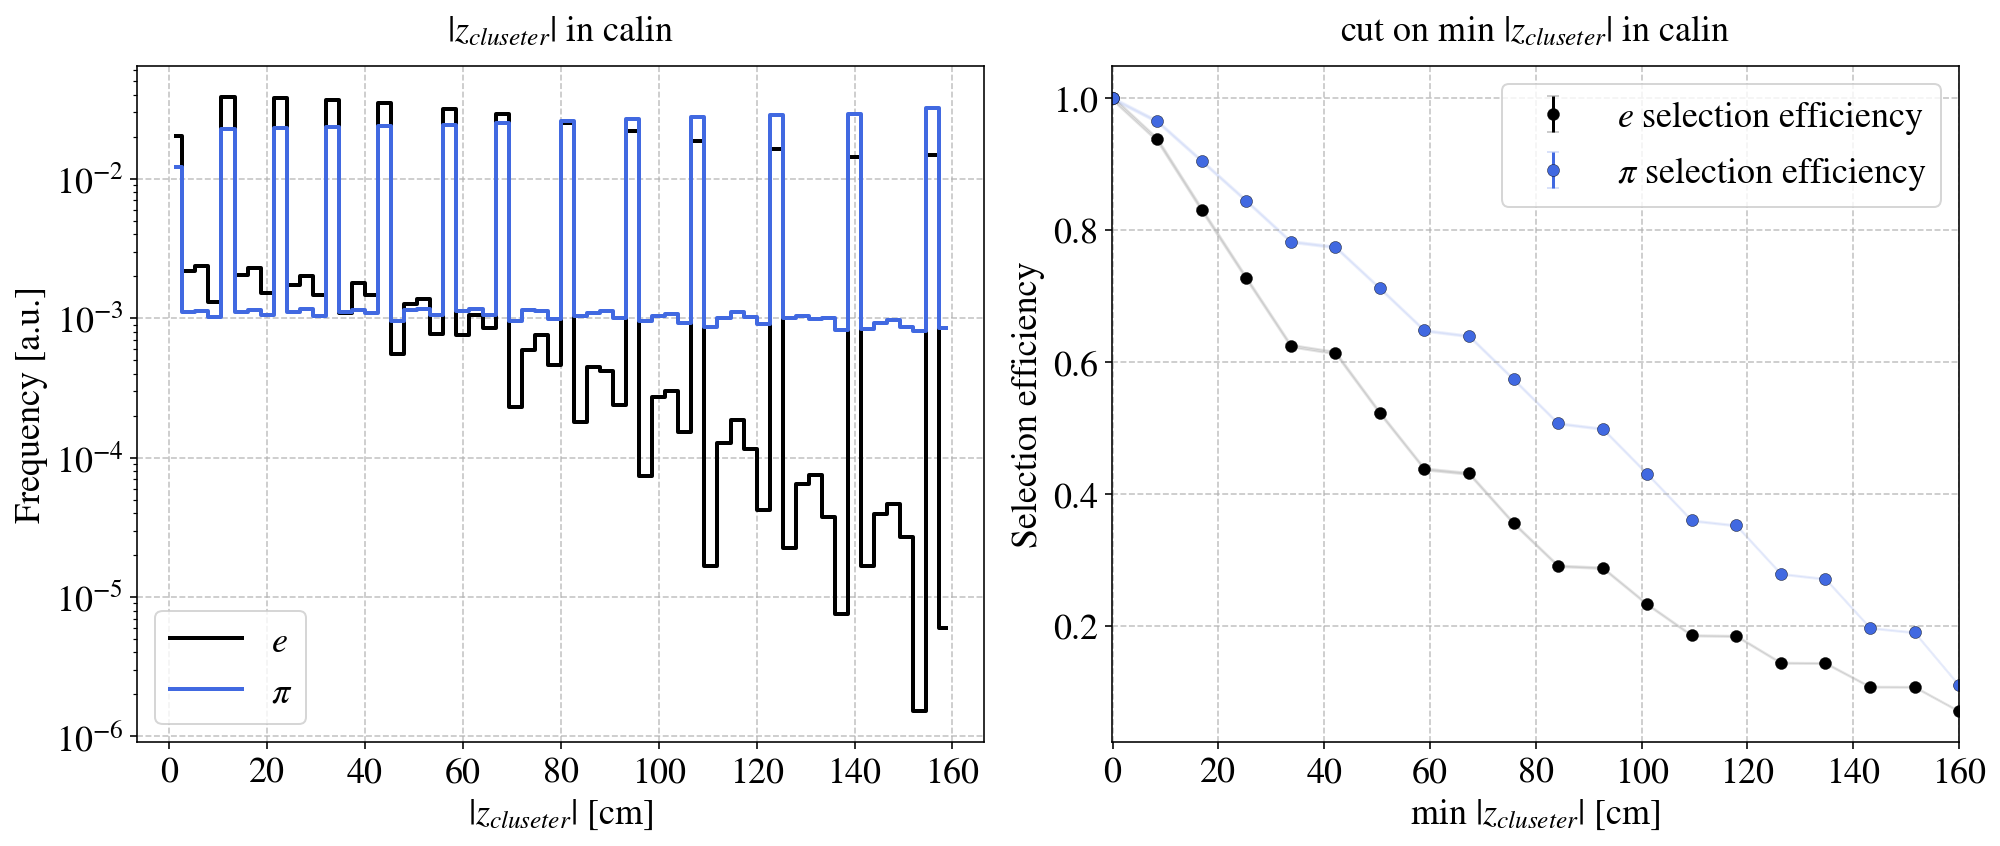

In [276]:
plot_1D_variable_and_cut(chainname='hcalin',chainlabel='calin',
                         variable='|z|',varlabel='$z_{cluseter}$',varunits='[cm]',
                         bins=np.linspace(0,160,61),
                         cut_values=np.linspace(0.,160,20),min_or_max='min')

# calout

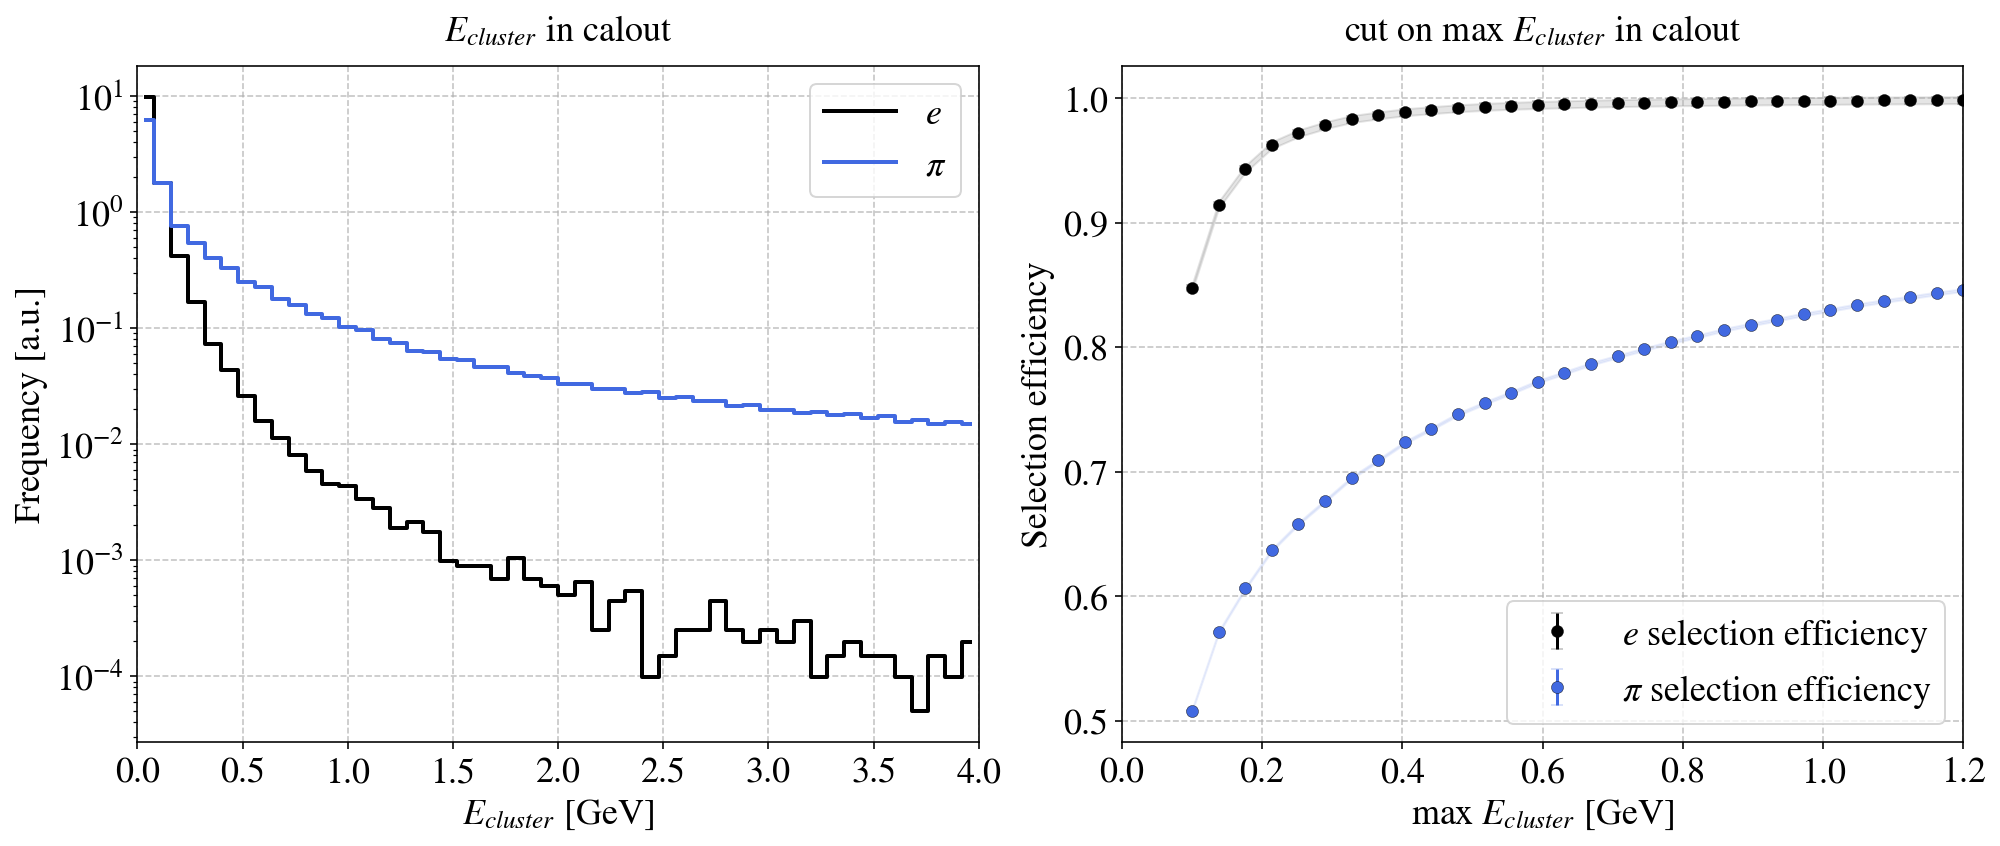

In [235]:
plot_1D_variable_and_cut(chainname='hcalout',chainlabel='calout',
                         variable='e',varlabel='$E_{cluster}$',varunits='[GeV]',
                         bins=np.linspace(0,4.,51),xlim=(0,4),cut_values=np.linspace(0.1,1.2,30),
                         min_or_max='max')

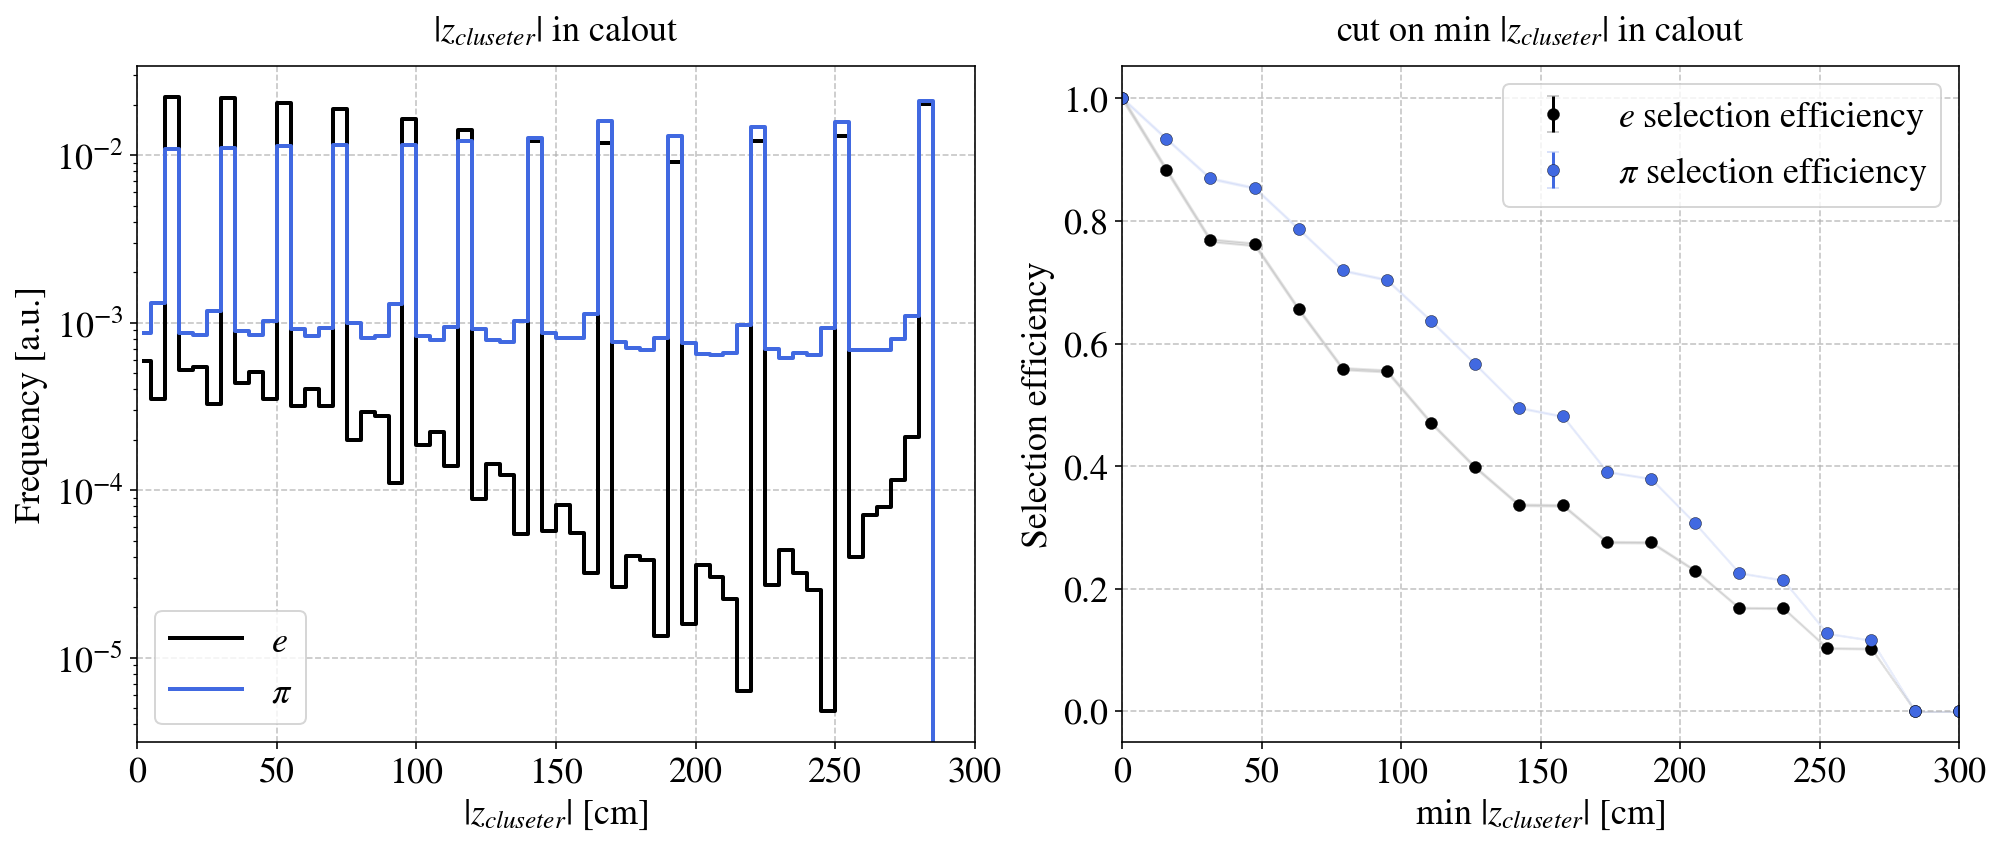

In [278]:
plot_1D_variable_and_cut(chainname='hcalout',chainlabel='calout',
                         variable='|z|',varlabel='$z_{cluseter}$',varunits='[cm]',
                         bins=np.linspace(0,300,61),xlim=(0,300),
                         cut_values=np.linspace(0.,300,20),min_or_max='min')

# fhcal

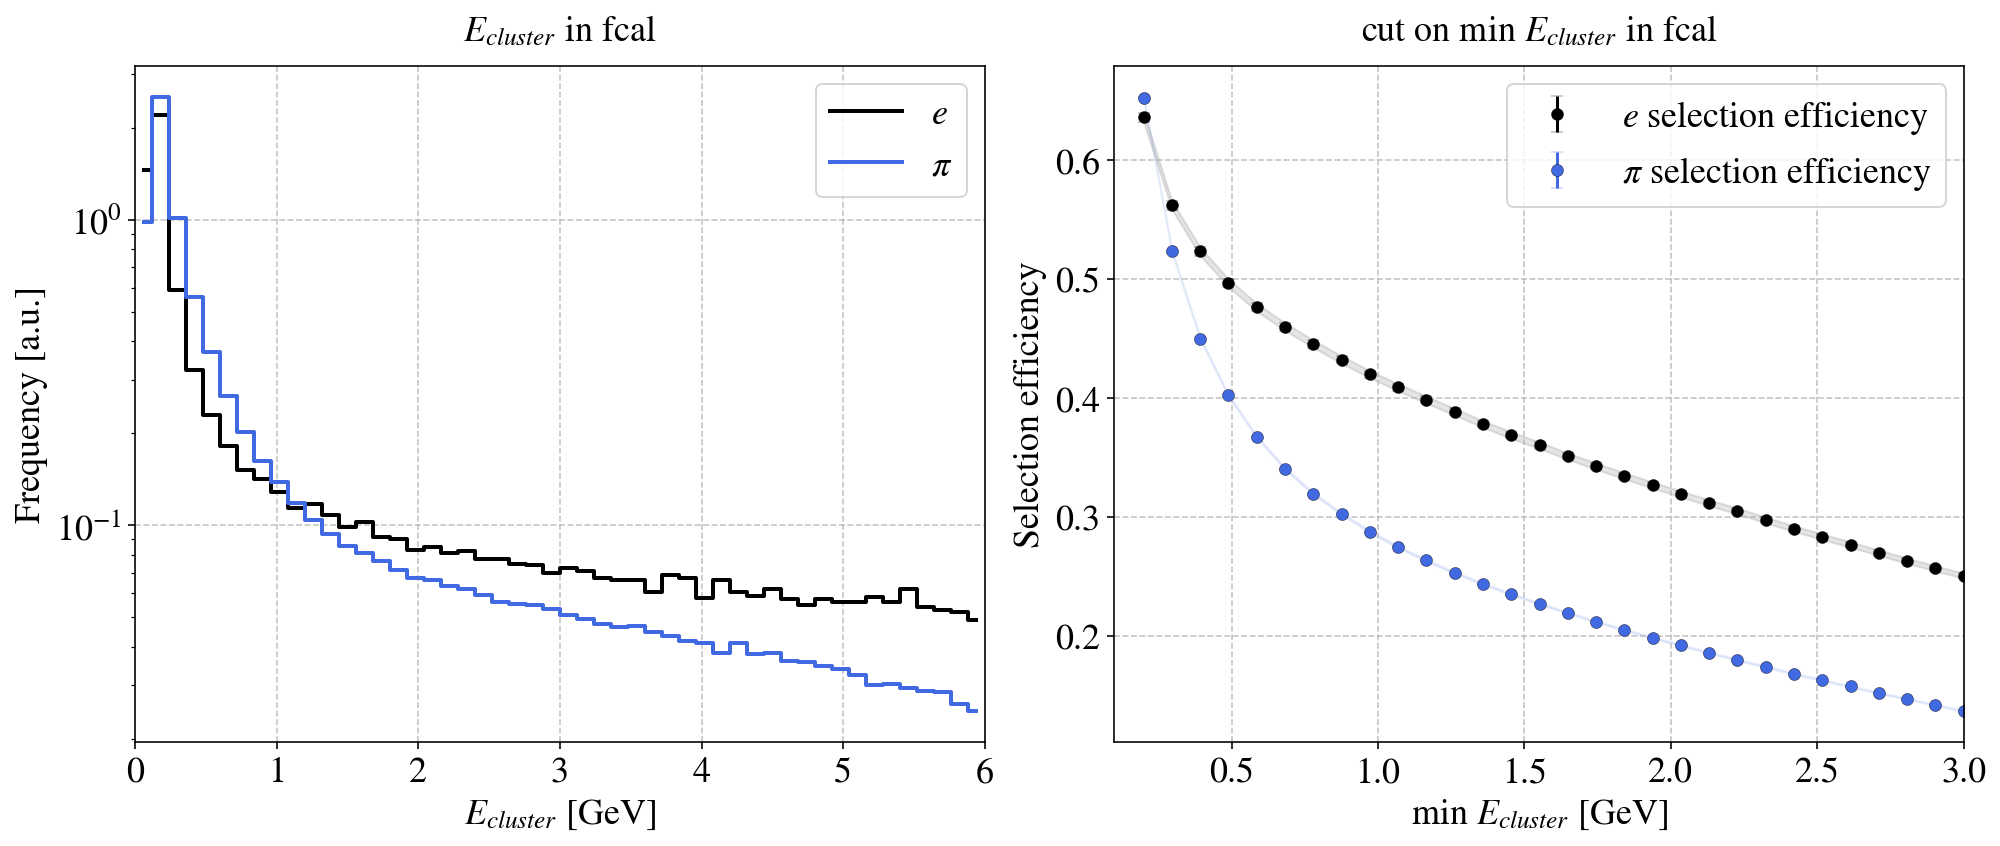

In [236]:
plot_1D_variable_and_cut(chainname='fhcal',chainlabel='fcal',
                         variable='e',varlabel='$E_{cluster}$',varunits='[GeV]',
                         bins=np.linspace(0,6,51),xlim=(0,6),
                         cut_values=np.linspace(0.2,3.,30),min_or_max='min')

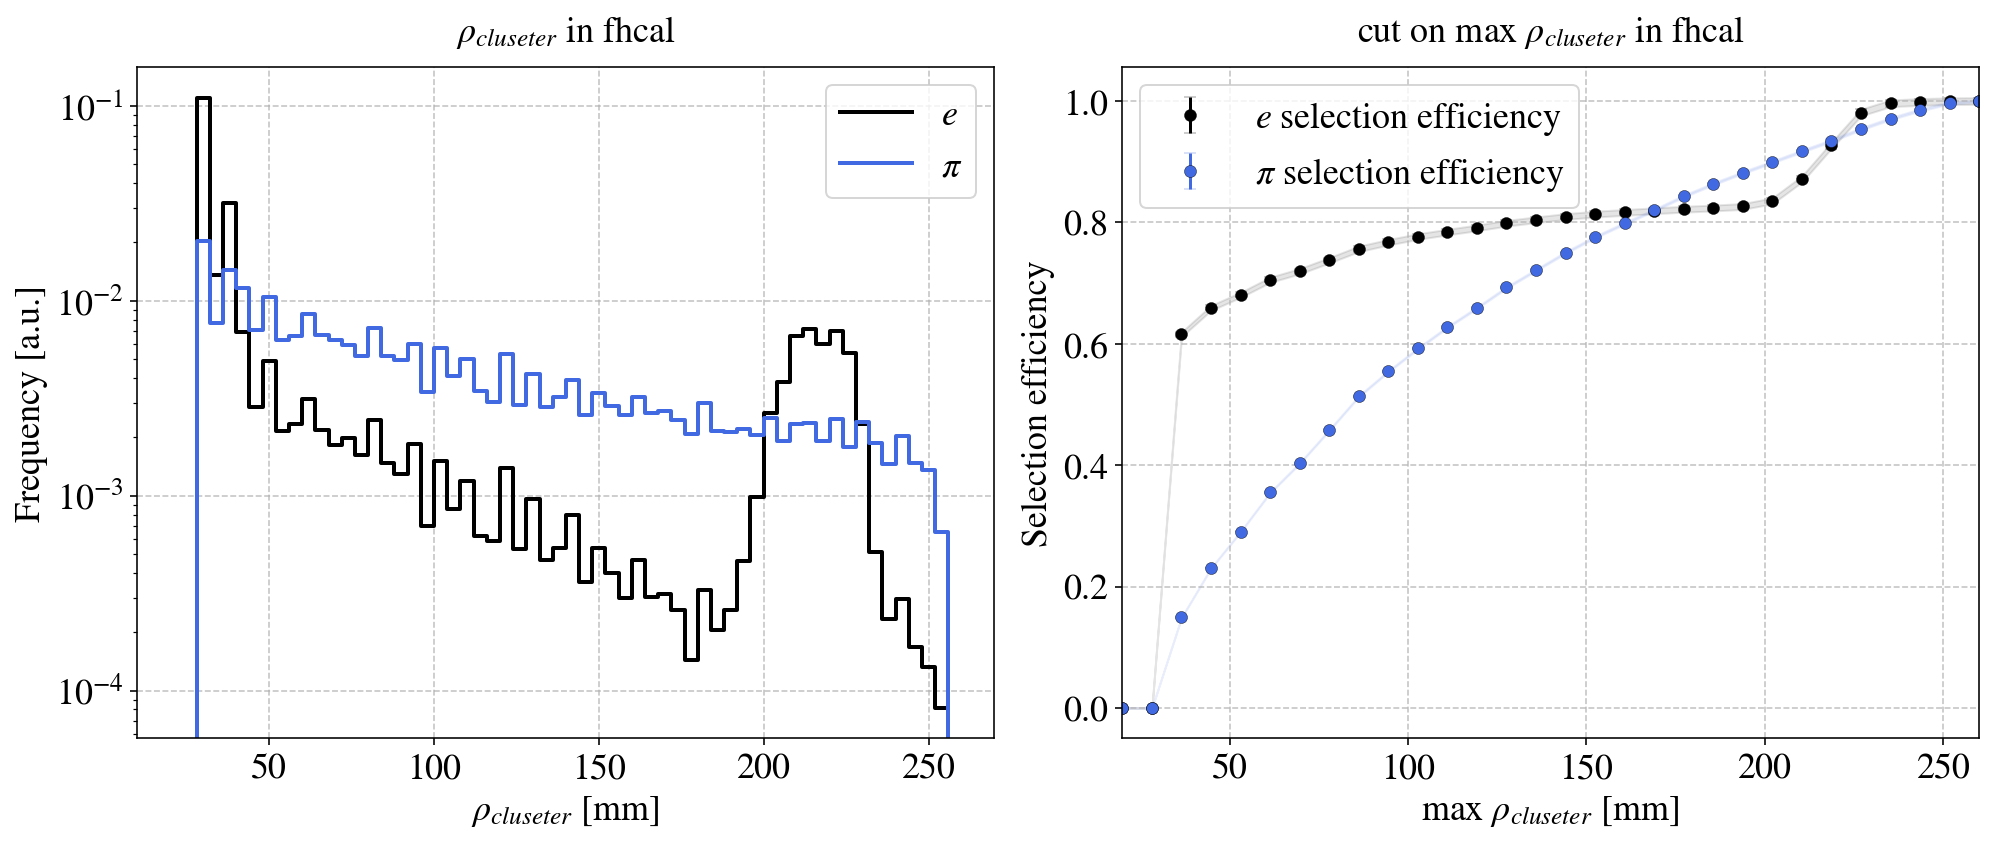

In [253]:
plot_1D_variable_and_cut(chainname='fhcal',chainlabel='fhcal',
                         variable='rho',varlabel='$\\rho_{cluseter}$',varunits='[mm]',
                         bins=np.linspace(20,260,61),xlim=(10,270),
                         cut_values=np.linspace(20.,260,30),min_or_max='max')

# add rapidity to the game

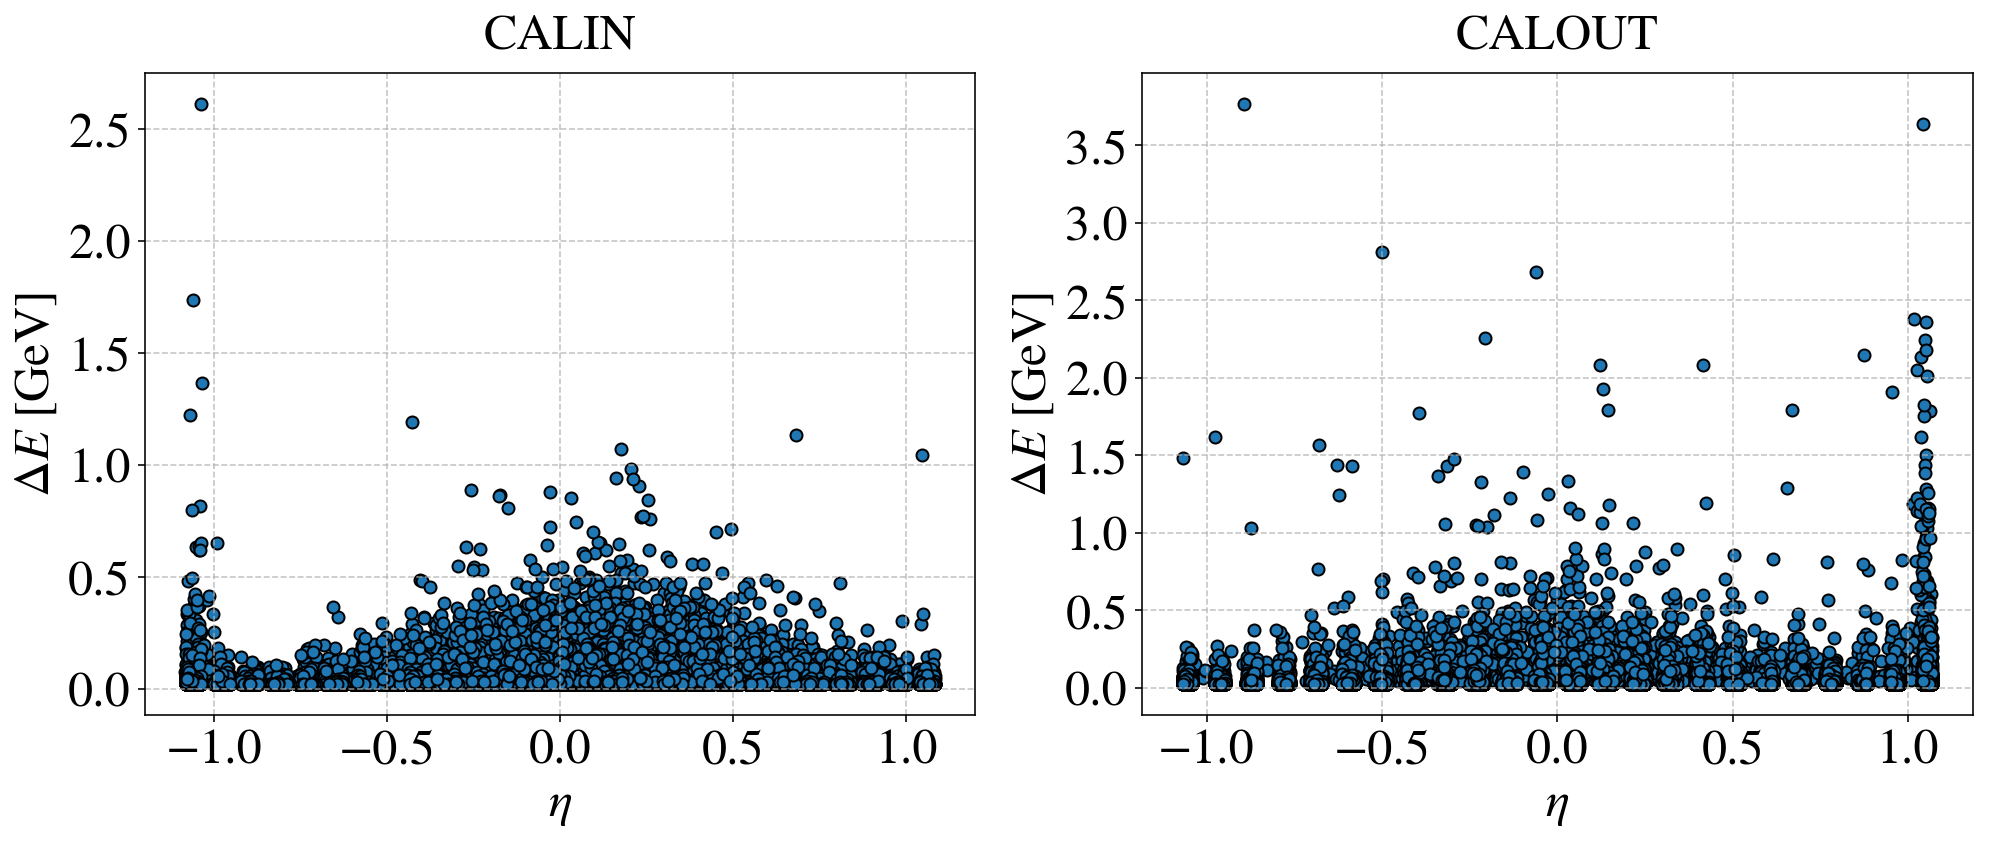

In [38]:
# eta_bins = np.linspace(-3,3,20) # GeV?
fig = plt.figure(figsize=(14,6))

ax = fig.add_subplot(1,2,1);
ax.scatter( e_calin.eta, e_calin.e,edgecolor='k');
set_axes(ax,'$\eta$','$\Delta E$ [GeV]',title='CALIN',do_add_grid=True)

ax = fig.add_subplot(1,2,2);
ax.scatter( e_calout.eta, e_calout.e,edgecolor='k');
set_axes(ax,'$\eta$','$\Delta E$ [GeV]',title='CALOUT',do_add_grid=True)

plt.tight_layout()